# My Reading Journey:  Insights from Goodreads Data

### Introduction
I joined Goodreads in 2019 to keep track of my reading adventures and even added a few books I’d read in previous years. Fast forward to today, my reading pace has picked up, and curiosity got the best of me—I started wondering about my reading habits and whether they reveal any interesting patterns or trends.

To satisfy my inner data geek, I exported my Goodreads data and, for an extra layer of analysis, manually added the authors’ genders where they weren’t already listed.

So, here it is—the story of my bookshelf, told through data! Let’s dive into the insights waiting to be uncovered.


To get started on analysing my reading data in Python, we will need some packages below:
- `pandas`: It is a data analysis and manipulation library that provides data structures and tools.
- `numpy`: It is a numerical computing library that provides support for large, multi-dimensional arrays and mathematical functions.
- `matplotlib.pyplot`: It is a plotting library for creating visualizations in Python.
- `seaborn`: It provides a high-level interface for drawing attractive and informative statistical graphics.

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Read the data
books = pd.read_csv('./data/goodreads_library_export.csv')

In [3]:
# Check NaNs and data types
books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 261 entries, 0 to 260
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Book Id                     261 non-null    int64  
 1   Title                       261 non-null    object 
 2   Author                      261 non-null    object 
 3   Author l-f                  261 non-null    object 
 4   Additional Authors          163 non-null    object 
 5   ISBN                        261 non-null    object 
 6   ISBN13                      261 non-null    object 
 7   My Rating                   261 non-null    int64  
 8   Average Rating              261 non-null    float64
 9   Publisher                   260 non-null    object 
 10  Binding                     261 non-null    object 
 11  Number of Pages             261 non-null    int64  
 12  Year Published              259 non-null    float64
 13  Original Publication Year   236 non

In [4]:
# Review data
books.sample(5)

,Book Id,Title,Author,Author l-f,Additional Authors,ISBN,ISBN13,My Rating,Average Rating,Publisher,...,Date Added,Bookshelves,Bookshelves with positions,Exclusive Shelf,My Review,Spoiler,Private Notes,Read Count,Owned Copies,Author Gender
6,25742426,Kuyu ve Sarkaç,Edgar Allan Poe,"Poe, Edgar Allan",NaN,"=""9750722205""","=""9789750722202""",0,4.15,Can Yayınları,...,2025/02/13,NaN,NaN,read,NaN,NaN,NaN,1,0,NaN
163,94425401,Güneşteki Adamlar,Ghassan Kanafani,"Kanafani, Ghassan","غسان كنفاني, Mehmet Hakkı Suçin","=""6053162779""","=""9786053162773""",5,4.21,Metis Kitap,...,2024/12/26,NaN,NaN,read,NaN,NaN,NaN,1,0,M
184,35249663,Inspired: How to Create Tech Products Customer...,Marty Cagan,"Cagan, Marty",NaN,"=""1119387507""","=""9781119387503""",0,4.24,John Wiley & Sons Inc,...,2024/12/07,NaN,NaN,read,NaN,NaN,NaN,1,0,M
7,213805482,Dip Akıntıları,Kirsty Bell,"Bell, Kirsty",Yasemin Çongar,"=""6057260171""","=""9786057260178""",4,4.02,Siren Yayınları,...,2025/01/29,NaN,NaN,read,NaN,NaN,NaN,1,0,F
144,30621290,Büyüleyici Bağırsak,Giulia Enders,"Enders, Giulia","Jill Enders, Alisa Candan Karsu","=""6059177050""","=""9786059177054""",0,4.07,Büyükada Yayıncılık,...,2025/01/14,NaN,NaN,read,NaN,NaN,NaN,1,0,F


In [5]:
# Change data types if needed
books['Date Read'] = pd.to_datetime(books['Date Read'])
books['Date Added'] = pd.to_datetime(books['Date Added'])

In [6]:
# Enter null in My Rating column instead of 0 to avoid giving incorrect information
books['My Rating'].replace(0, np.nan, inplace= True)
books['My Rating'] = books['My Rating'].astype('Int64')
books['My Rating'].unique()

<IntegerArray>
[4, <NA>, 5, 3, 2]
Length: 5, dtype: Int64

In [7]:
# Filter the read books only (there may be to-read books still unread)
books = books[books['Read Count'] == 1]

### My Yearly Reading Journey

In [8]:
# Extract the year from date
books['Year Read'] = books['Date Read'].dt.year.astype('Int64')
books.sample(5)

,Book Id,Title,Author,Author l-f,Additional Authors,ISBN,ISBN13,My Rating,Average Rating,Publisher,...,Bookshelves,Bookshelves with positions,Exclusive Shelf,My Review,Spoiler,Private Notes,Read Count,Owned Copies,Author Gender,Year Read
199,211157684,Akademi İçin Bir Rapor,Mahi Grand,"Grand, Mahi",Hasan Can Utku,"=""6259962606""","=""9786259962603""",4,3.59,Desen Yayınları,...,NaN,NaN,read,NaN,NaN,NaN,1,0,M,2024
149,18662065,Beyoğlu'nun En Güzel Abisi,Ahmet Ümit,"Ümit, Ahmet",NaN,"=""6051416838""","=""9786051416830""",<NA>,3.81,Everest Yayınları,...,NaN,NaN,read,NaN,NaN,NaN,1,0,M,2010
34,28371803,Yalnızlar İçin Çok Özel Bir Hizmet,Murat Gülsoy,"Gülsoy, Murat",NaN,"=""9750729986""","=""9789750729980""",5,3.60,Can Yayınları,...,NaN,NaN,read,NaN,NaN,NaN,1,0,M,2023
255,13174468,Boş Zaman,Hakan Bıçakcı,"Bıçakcı, Hakan",NaN,"=""9750508890""","=""9789750508899""",<NA>,3.48,İletişim Yayıncılık,...,NaN,NaN,read,NaN,NaN,NaN,1,0,M,2023
114,25046163,Kolera Günlerinde Aşk,Gabriel García Márquez,"Márquez, Gabriel García",Şadan Karadeniz,"=""9750730143""","=""9789750730146""",<NA>,3.94,Can Yayınları,...,NaN,NaN,read,NaN,NaN,NaN,1,0,M,2010


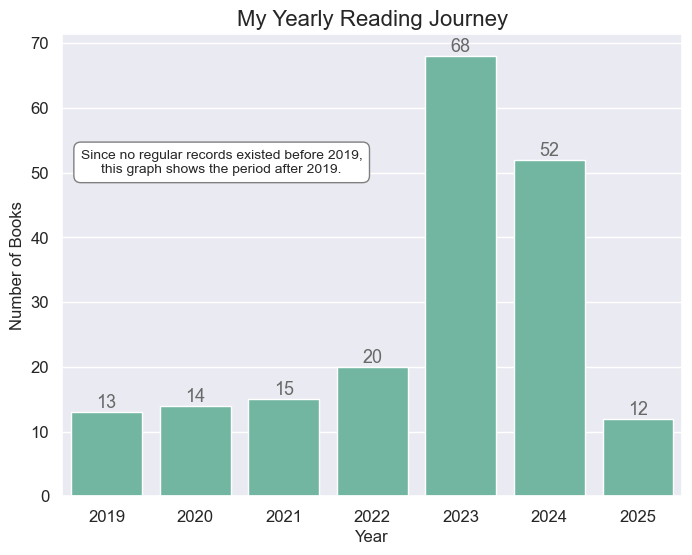

In [9]:
# I need this filter because of no regular data before 2019
yearly_books = books[books['Year Read'] > 2018].groupby('Year Read')['Book Id'].count().reset_index(name= 'Counts')

# Visualizing yearly readings
# Set the theme and size of the plot
plt.figure(figsize=(8,6))
sns.set_theme(style= 'darkgrid', palette='Set2')

# Create the plot, change the title
ax = sns.barplot(data= yearly_books, x= 'Year Read', y= 'Counts')
plt.title('My Yearly Reading Journey', fontsize= 16)

# Change labels and their settings
plt.xlabel('Year', fontsize= 12)
plt.xticks(fontsize= 12)
plt.ylabel('Number of Books', fontsize= 12)
plt.yticks(fontsize= 12)

# Add a text annotation explaining the filter
plt.text(x= 1.3, y= 50, s= 'Since no regular records existed before 2019,\nthis graph shows the period after 2019.', fontsize= 10, ha= 'center',
        bbox=dict(facecolor='white', edgecolor='gray', boxstyle='round,pad=0.5'))

# Loop through containers and add annotations
for container in ax.containers:
    ax.bar_label(container, fontsize= 13, color= 'dimgray', label_type= 'edge')

# Show the plot
plt.show();

### How Generous Am I with My Ratings?

In [10]:
# Count each rating
my_ratings = books.groupby('My Rating')['My Rating'].count().reset_index(name= 'Counts')
my_ratings

,My Rating,Counts
0,2,2
1,3,12
2,4,58
3,5,42


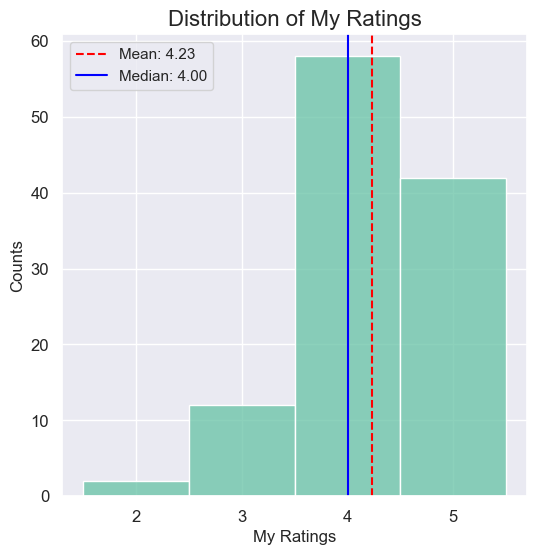

In [11]:
# Visualizing distribution of my rating
# Filter rated ones only for better visualization
books_with_rating = books.dropna(subset=['My Rating'])

# Set the theme and size of the plot
plt.figure(figsize=(6,6))
sns.set_theme(style= 'darkgrid', palette='Set2')

# Create the plot, change the title
sns.histplot(data= books_with_rating, x= 'My Rating', discrete= True)
plt.title('Distribution of My Ratings', fontsize= 16)

# Change labels and their settings
plt.xlabel('My Ratings', fontsize= 12)
plt.xticks([2, 3, 4, 5], fontsize= 12)

plt.ylabel('Counts', fontsize= 12)
plt.yticks(fontsize= 12)

# Add mean and median for rating
mean_value = np.nanmean(books_with_rating['My Rating'])
median_value = np.median(books_with_rating['My Rating'])
plt.axvline(x= mean_value, color='red', linestyle='--', label=f'Mean: {mean_value:.2f}')
plt.axvline(x= median_value, color='blue', linestyle='-', label=f'Median: {median_value:.2f}')
plt.legend()

# Show the plot
plt.show();

### My 5 Favorite and 5 Least Favorite Books

In [12]:
# Sort and filter the max-rated books
fav_5_books = books_with_rating.sort_values(['My Rating', 'Average Rating'], ascending= [False, False]).loc[:, ['Title', 'Author', 'My Rating', 'Average Rating', 'Number of Pages']].head(5)

# Sort and filter the min-rated books
least_5_books = books_with_rating.sort_values(['My Rating', 'Average Rating'], ascending= [True, True]).loc[:, ['Title', 'Author', 'My Rating', 'Average Rating', 'Number of Pages']].head(5)

# Display them
display(fav_5_books)
display(least_5_books)

,Title,Author,My Rating,Average Rating,Number of Pages
196,"Bağımlılık (Kopenhag Üçlemesi, #3)",Tove Ditlevsen,5,4.40,128
23,Emanet Çocuk,Claire Keegan,5,4.32,80
46,Olay,Annie Ernaux,5,4.31,77
15,Gurur ve Önyargı,Jane Austen,5,4.29,424
68,Satranç,Stefan Zweig,5,4.27,72


,Title,Author,My Rating,Average Rating,Number of Pages
191,Güzel Sanatların Bir Dalı Olarak Evlilik,Julia Kristeva,2,3.20,104
195,Konusmalar,Konfücyus,2,3.81,136
217,Sabah Yolcuları,Feyza Hepçilingirler,3,3.19,142
202,Merkez İstasyonu'nda Oturup Ağladım,Elizabeth Smart,3,3.49,115
60,Hatırlıyorum,Georges Perec,3,3.52,136


### Do My Ratings Align with the Crowd?

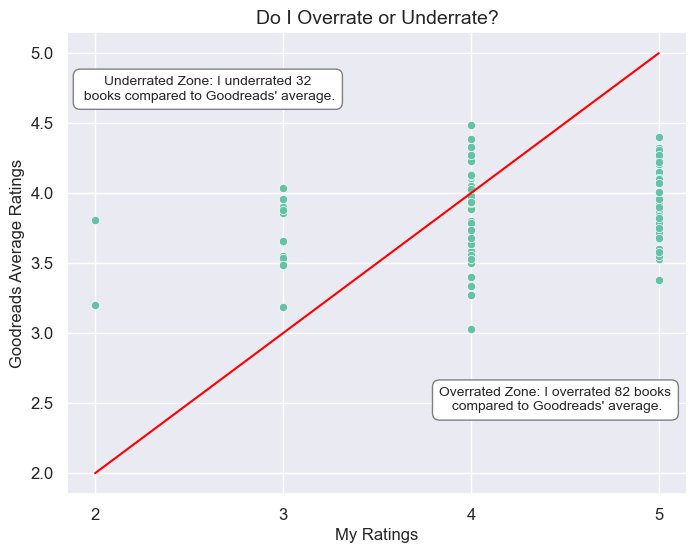

In [13]:
# Calculate difference between my ratings and Goodreads' average ratings
books['Diff Average Rating'] = books['My Rating'] - books['Average Rating']

# Count underrated/overrated books
overrated = books[books['Diff Average Rating'] >= 0]['Book Id'].count()
underrated = books[books['Diff Average Rating'] < 0]['Book Id'].count()

# Visualizing my rating vs. average ratings
# Set the theme and size of the plot
plt.figure(figsize=(8,6))
sns.set_theme(style= 'darkgrid', palette='Set2')

# Create the plot, change the title
sns.scatterplot(data= books_with_rating, x= 'My Rating', y= 'Average Rating')
plt.title('Do I Overrate or Underrate?', fontsize= 14)

# Change labels and their settings
plt.xlabel('My Ratings', fontsize= 12)
plt.xticks([2.0, 3.0, 4.0, 5.0], fontsize= 12)
plt.ylabel('Goodreads Average Ratings', fontsize= 12)
plt.yticks(fontsize= 12)

# Add y = x reference line
plt.plot([min(books_with_rating['My Rating']), max(books_with_rating['My Rating'])], 
         [min(books_with_rating['My Rating']), max(books_with_rating['My Rating'])], 
         color='red', linestyle='-')

# Add a text annotation explaining underrated/overrated
plt.text(x= 4.45, y= 2.45, s= f"Overrated Zone: I overrated {overrated} books\n compared to Goodreads' average.", fontsize= 10, ha= 'center',
        bbox=dict(facecolor='white', edgecolor='gray', boxstyle='round,pad=0.5'))

plt.text(x= 2.6, y= 4.67, s= f"Underrated Zone: I underrated {underrated}\n books compared to Goodreads' average.", fontsize= 10, ha= 'center',
        bbox=dict(facecolor='white', edgecolor='gray', boxstyle='round,pad=0.5'))

# Show the plot
plt.show();

### How Long Are the Books I Read?

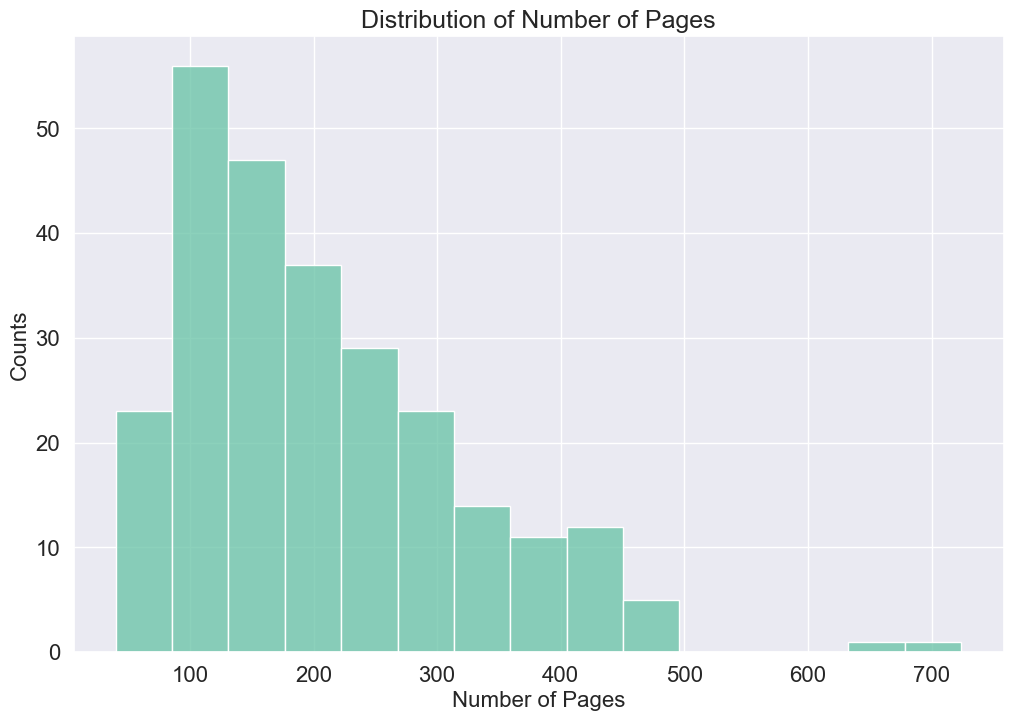

In [14]:
# Visualizing distribution of number of pages
# Set the theme and size of the plot
plt.figure(figsize=(12,8))
sns.set_theme(style= 'darkgrid', palette='Set2')

# Create the plot, change the title
sns.histplot(data= books['Number of Pages'])
plt.title('Distribution of Number of Pages', fontsize= 18)

# Change labels and their settings
plt.xlabel('Number of Pages', fontsize= 16)
plt.xticks(fontsize= 16)
plt.ylabel('Counts', fontsize= 16)
plt.yticks(fontsize= 16)

# Show the plot
plt.show();

### What were the shortest and longest books I've ever read?

In [15]:
# Finding the shortest and longest book I've read
shortest_book = books[books['Number of Pages'] == books['Number of Pages'].min()]['Title'].values[0]
shortest_page = round(books[books['Number of Pages'] == books['Number of Pages'].min()]['Number of Pages'].values[0])

longest_book = books[books['Number of Pages'] == books['Number of Pages'].max()]['Title'].values[0]
longest_page = round(books[books['Number of Pages'] == books['Number of Pages'].max()]['Number of Pages'].values[0])

print(f"The shortest book you've read is '{shortest_book}' with {shortest_page} pages.")
print(f"The longest book you've read is '{longest_book}' with {longest_page} pages.")

The shortest book you've read is 'Otel Paranoya' with 40 pages.
The longest book you've read is 'Tutunamayanlar' with 724 pages.


### Who Are My Most-Read Authors?

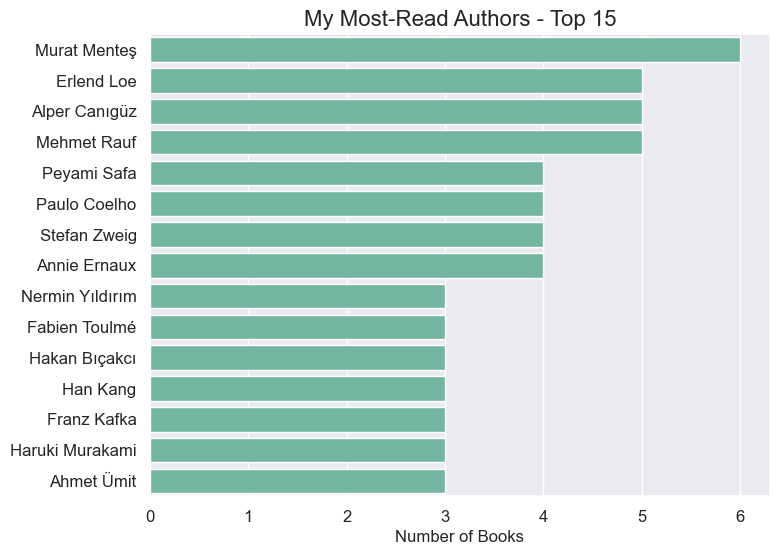

In [16]:
# Filter top N authors
n = 15
author_top_n = books.groupby('Author')['Book Id'].count().reset_index(name= 'Counts').sort_values('Counts', ascending= False).head(n)

# Visualizing top N authors
# Set the theme and size of the plot
plt.figure(figsize=(8,6))
sns.set_theme(style= 'darkgrid', palette='Set2')

# Create the plot, change the title
sns.barplot(data= author_top_n, x= 'Counts', y= 'Author')
plt.title(f'My Most-Read Authors - Top {n}', fontsize= 16)

# Change labels and their settings
plt.xlabel('Number of Books', fontsize= 12)
plt.xticks(fontsize= 12)
plt.ylabel('', fontsize= 12)
plt.yticks(fontsize= 12)

# Show the plot
plt.show();

### Gender Distribution of the Authors

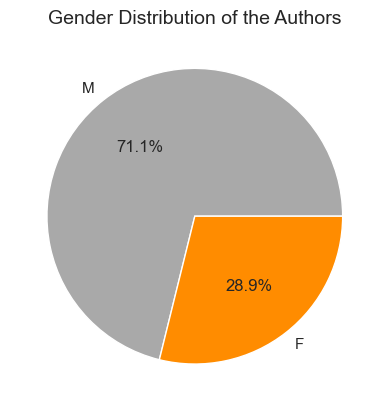

In [17]:
# Find percentages of gender
author_gender = books['Author Gender'].value_counts(normalize= True).reset_index(name= 'Percentage')

# Visualizing gender distribution of authors
# Create the plot, change the title
plt.pie(x= author_gender['Percentage'], labels= author_gender['Author Gender'], colors= ['darkgray', 'darkorange'], autopct='%1.1f%%')
plt.title('Gender Distribution of the Authors', fontsize= 14)

# Show the plot
plt.show();

### Top 10 Publishers on My Shelf

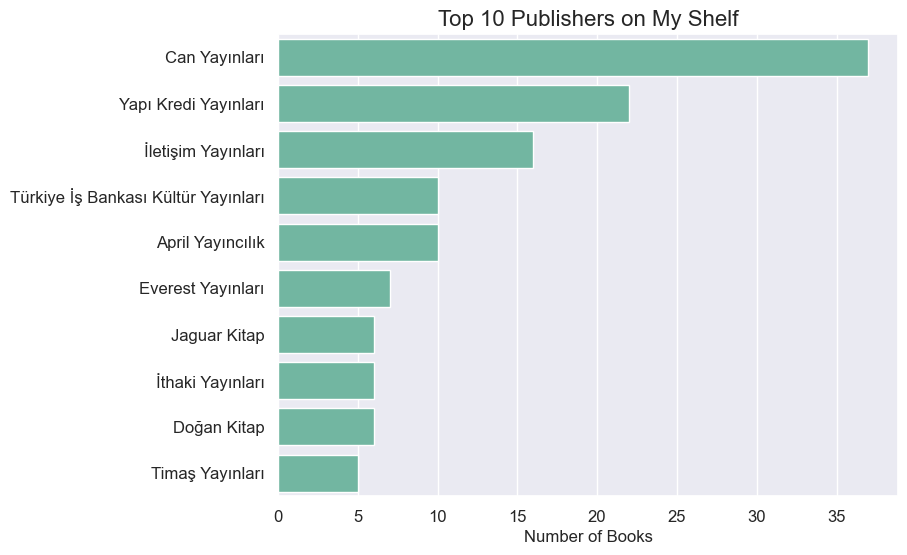

In [18]:
# Filter top 10 publishers
publisher_top_10 = books.groupby('Publisher')['Book Id'].count().reset_index(name= 'Counts').sort_values('Counts', ascending= False).head(10)

# Visualizing top 10 publishers
# Set the theme and size of the plot
plt.figure(figsize=(8,6))
sns.set_theme(style= 'darkgrid', palette='Set2')

# Create the plot, change the title
sns.barplot(data= publisher_top_10, x= 'Counts', y= 'Publisher')
plt.title('Top 10 Publishers on My Shelf', fontsize= 16)

# Change labels and their settings
plt.xlabel('Number of Books', fontsize= 12)
plt.xticks(fontsize= 12)
plt.ylabel('', fontsize= 12)
plt.yticks(fontsize= 12)

# Show the plot
plt.show();

### What Book Formats Do I Really Love?

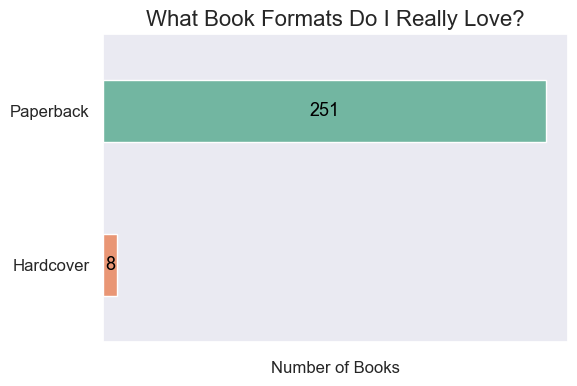

In [19]:
# Visualizing top 10 publishers
# Set the theme and size of the plot
plt.figure(figsize=(6,4))
sns.set_theme(style= 'dark', palette='Set2')

# Create the plot, change the title
ax = sns.countplot(data= books, y= 'Binding', hue= 'Binding', width= 0.4)
plt.title('What Book Formats Do I Really Love?', fontsize= 16)

# Loop through containers and add annotations
for container in ax.containers:
    ax.bar_label(container, fontsize= 13, color= 'black', label_type= 'center')

# Change labels and their settings
plt.xlabel('Number of Books', fontsize= 12)
ax.set(xticklabels=[])
plt.ylabel('', fontsize= 12)
plt.yticks(fontsize= 12)

# Show the plot
plt.show();